# Real estate ads study

We have at our disposal the data of the Yandex.Realty service - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. It is necessary to determine the parameters that affect the market value of real estate.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

### General information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
data = pd.read_csv('real_estate_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

The dataset is represented by 23699 rows. More than half of the columns have gaps. In some of them, the proportion of missing values is very significant and amounts to more than 50% of the total number of rows.

With the exception of `cityCenters_nearest`, all columns are named using snakecase. We only need to rename it.

In [3]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

Let's study the general information about the dataset:

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


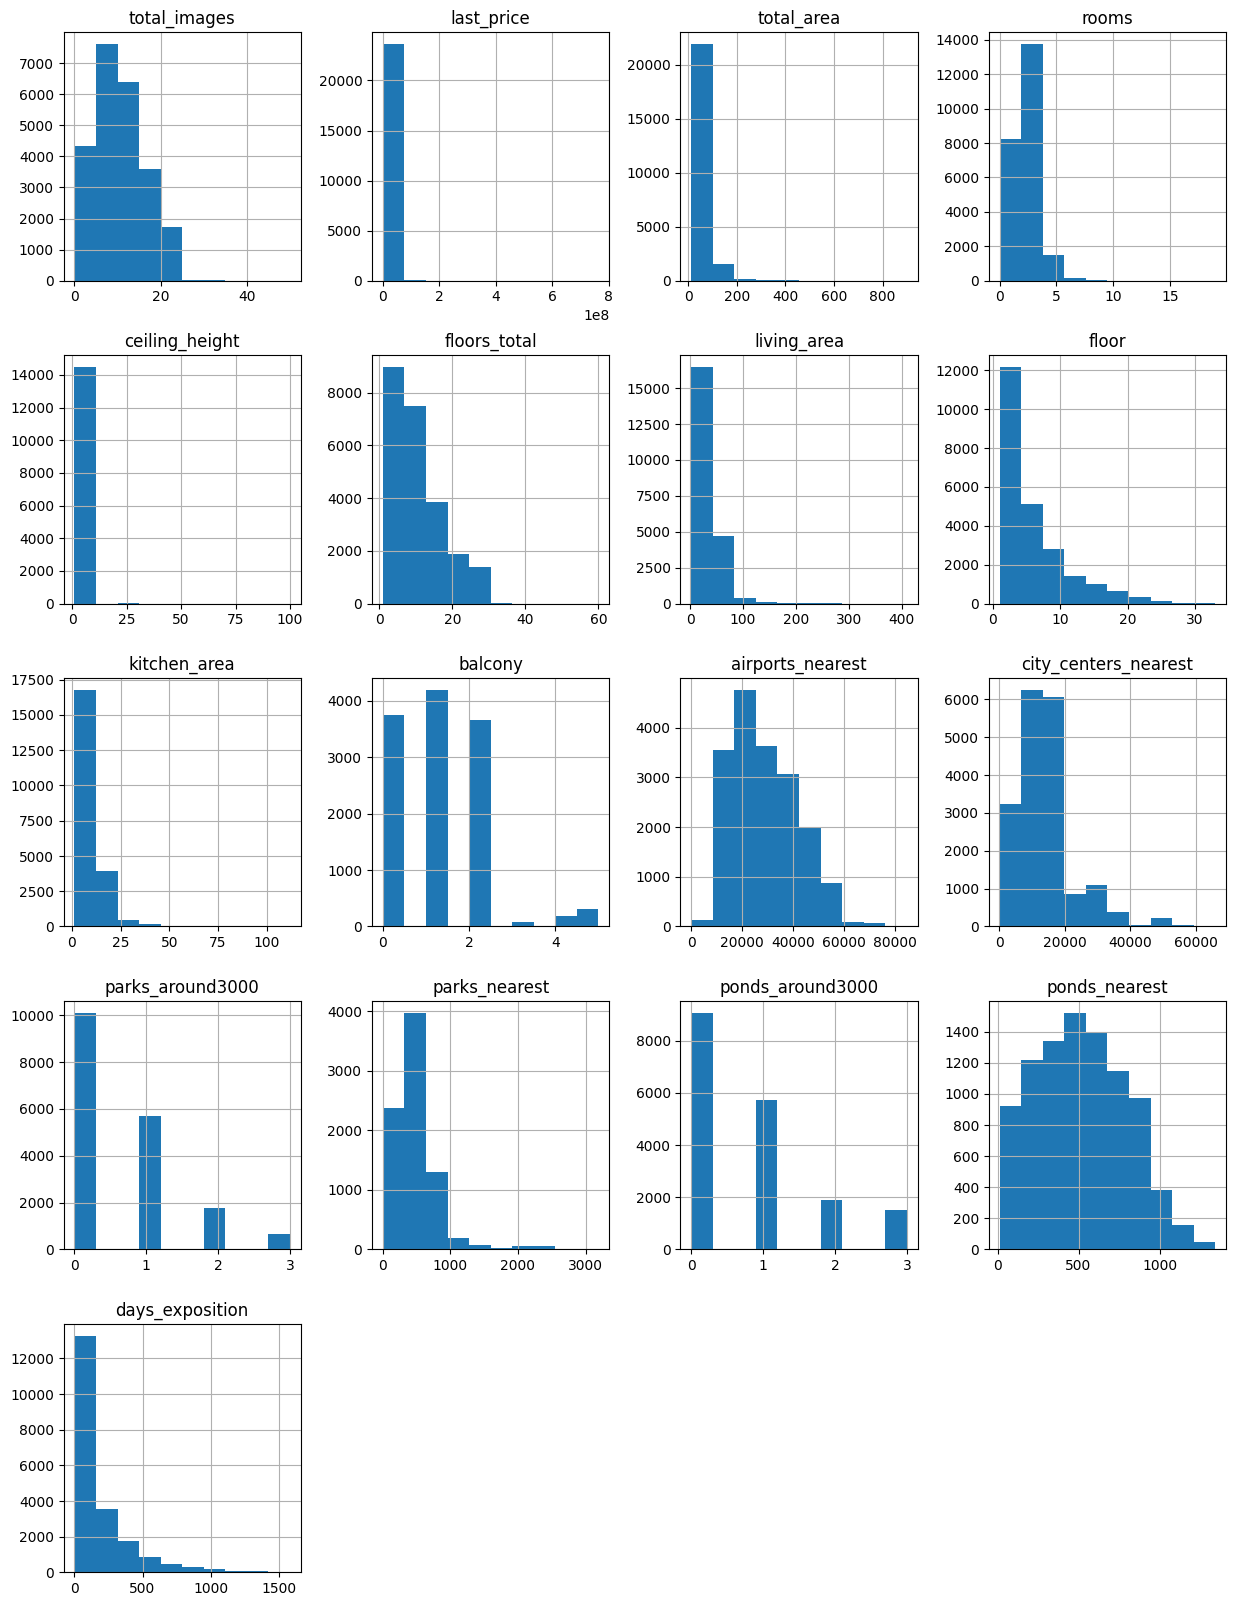

In [4]:
display(data.describe())
data.hist(figsize=(15, 20));

The data set contains advertisements for the sale of real estate in the most diverse buildings: from one-story houses to skyscrapers. Transaction prices range from tens of thousands to hundreds of millions of rubles.\
It can be immediately noted that there are anomalies in the dataset, such as 100-meter ceilings and a distance to the nearest airport of 0 meters.

### Data preprocessing

#### Missing values
Let's examine the gaps present in the data set.

In [5]:
pd.set_option('display.max_columns', None)
display(data.head())
data.isna().sum()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

There are quite a few missing values. Let's start with the simplest.
##### `balcony`
The gaps in the `balcony` column most likely indicate that there is no balcony in principle, so the seller did not specify anything. Let's replace all gaps in this column with 0 and check the result.

In [6]:
data.balcony.fillna(0, inplace=True)
data.balcony.isna().sum()

0

##### `is_apartment`
Similarly, fill in the gaps in the `is_apartment` column with the value `False`, since the absence of data in this column most likely indicates that the property for sale is not an apartment.

In [7]:
data.is_apartment.fillna(False, inplace=True)
print(data.is_apartment.unique())
data.is_apartment.isna().sum()

[False  True]


0

##### `kitchen_area`
Consider the missing values in the `kitchen_area` column.\
First of all, let's check what kitchen areas are indicated in studio apartments, and how many studios are represented in the set.

In [8]:
print('Number of studios:', data[data.studio == True].studio.count())

Number of studios: 149


In [9]:
data[data.studio == True].kitchen_area.unique()

array([nan])

We see that all studio apartments have no information about the kitchen area. This is quite logical. Therefore, we will enter 0 in the `kitchen_area` column for this type of apartment and check that the number of gaps in the column has changed exactly by the number of studios.

In [10]:
data.loc[data.studio == True, 'kitchen_area'] = 0
2278 - data.kitchen_area.isna().sum() == 149

True

Now let's check for other types of apartments whether the omission of information about the kitchen area means its absence.
We can do this by finding the difference between the total area of housing and the living area in the rows that contain gaps.\
If the value is near zero, this will confirm the absence of a kitchen. If the difference is significant, it can be assumed that there is still a kitchen in the apartment.

In [11]:
data_no_kitchen = data[data.kitchen_area.isna()]
total_minus_living_area = data_no_kitchen.total_area - data_no_kitchen.living_area
total_minus_living_area.isna().sum()

1454

For about 35% of the initial gaps, we managed to find the desired difference. Consider the available data.

In [12]:
total_minus_living_area.describe()

count    675.000000
mean      20.633156
std       17.763696
min        0.000000
25%        9.905000
50%       18.000000
75%       26.070000
max      230.000000
dtype: float64

In [13]:
total_minus_living_area.median()

18.0

The median of the sample is 18 m2, which corresponds to the area of an average kitchen.\
I suggest filling in the gaps as follows:
- for advertisements with sufficient information, calculate the ratio of the kitchen area to the total area,
- find the median value of these ratios,
- multiplying it by the total area of ​​the apartment, calculate the kitchen area.

In [14]:
kitchen_to_total_median = (data.kitchen_area / data.total_area).median()
kitchen_to_total_median

0.17186672229285865

In [15]:
data.kitchen_area.fillna(kitchen_to_total_median * data.total_area, inplace=True)
data.kitchen_area.isna().sum()

0

##### `living_area`
Consider now the gaps in the `living_area` column. \
Let's fill them in the same way, by calculating the median value of the ratio of living area to the total for all apartments and multiplying it by the total area of a particular option.\
However, before that, it is worth checking what is noted in the `living_area` column for studio apartments.

In [16]:
data[data.studio == True].living_area.head()

144    15.50
440    24.75
608      NaN
697    17.50
716    12.00
Name: living_area, dtype: float64

We see that for this type of apartments, the living area was entered in the table, and was not left omitted, like the kitchen area. Therefore, we can make the desired replacement for them.

In [17]:
living_to_total_median = (data.living_area / data.total_area).median()
print('Median value of the living/total areas ratio for all apartments:', living_to_total_median)
data.living_area.fillna(living_to_total_median * data.total_area, inplace=True)
data.living_area.isna().sum()

Median value of the living/total areas ratio for all apartments: 0.5678598992678503


0

##### Map data
For the map data group `airports_nearest`, `city_centers_nearest`, `parks_around3000`, and `ponds_around3000`, the number of gaps is nearly identical at 5,500.\
Let's see if they are on the same lines.

In [18]:
data[data.airports_nearest.isna()].isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          2578
floors_total              10
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              8
airports_nearest        5542
city_centers_nearest    5518
parks_around3000        5518
parks_nearest           5522
ponds_around3000        5518
ponds_nearest           5534
days_exposition          867
dtype: int64

Indeed, all the gaps in the columns listed above are located in one set of rows. Lets see if all these properties are located in the same area?

In [19]:
data[data.airports_nearest.isna()].locality_name.unique()

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

As you can see, the geography of objects with gaps is as extensive as possible. However, for a large number of localities, especially villages and towns, it is possible to fill in the missing airport distances with data from other rows that have the same values in the `locality_name` column. Let's check if there are values for such settlements in the dataset.

In [20]:
warnings.filterwarnings("ignore")

for locality in data[data.airports_nearest.isna()].locality_name.unique():
    data.loc[(data.locality_name == locality) & (data.airports_nearest.isna()), 'airports_nearest'] = \
        data.loc[data.locality_name == locality, 'airports_nearest'].median()

In [21]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5394
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

It turns out that for most of the ads in these settlements there is no cartographic information (only a little more than a hundred gaps were filled). Most likely, this is a technical failure when calculating distances to key objects at points specified by users. In this case, we leave the gaps in these lines unchanged.

##### `ceiling_height`
Let's deal with the gaps in the column with the height of the ceilings.\
It is logical to assume that in houses of the same type it will be approximately equal. I propose to break all the ads into categories according to the number of floors in the house:
- 1-3 floors - most likely private houses
- 4-9 floors - standard building
- 10+ floors - high

Next, for these categories, we calculate the median ceiling heights and fill in the gaps with them.

In [22]:
# Create a function to categorize data
def floors_category(row):
    if 1 <= row.floors_total <= 3:
        return 0
    elif 4 <= row.floors_total <= 9:
        return 1
    elif row.floors_total >= 10:
        return 2
    else:
        return 'undefined'
    
# Apply the function and write the result to a new column
data['floors_cat'] = data.apply(floors_category, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floors_cat
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,False,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,False,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,1
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,90.289724,9,False,False,False,27.326809,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2


In [23]:
for cat in [0, 1, 2, 'undefined']:
    data.loc[(data.ceiling_height.isna()) & (data.floors_cat == cat), 'ceiling_height'] = \
        data[data.floors_cat == cat]['ceiling_height'].median()
display(data.head())
print('Number of gaps in ceiling_height:', data.ceiling_height.isna().sum())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floors_cat
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.70,11.0,18.600000,1,False,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5.0,34.300000,4,False,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,1
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,90.289724,9,False,False,False,27.326809,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2


Number of gaps in ceiling_height: 0


##### `floors_total`
I consider it expedient to leave gaps in the `floors_total` column unchanged, since their relative number is extremely small.

##### `days_exposition`
We also want to leave the `days_exposition` column unchanged, since a large number of parameters should influence this value. Most probably replacing the average or median value will be incorrect.\
Just in case, let's check if the duration of the sale is highly correlated with some other value, and we will be able to fill in the gaps with high accuracy.

In [24]:
data.corr()['days_exposition']

total_images           -0.026657
last_price              0.081146
total_area              0.149675
rooms                   0.126961
ceiling_height          0.017223
floors_total           -0.052234
living_area             0.143853
floor                  -0.039463
is_apartment            0.015262
studio                 -0.022476
open_plan              -0.024112
kitchen_area            0.114093
balcony                -0.027834
airports_nearest       -0.019680
city_centers_nearest   -0.060714
parks_around3000        0.060491
parks_nearest           0.023254
ponds_around3000        0.073162
ponds_nearest          -0.077879
days_exposition         1.000000
Name: days_exposition, dtype: float64

Indeed, we will not predict the value of `days_exposition` by the value of any other column. At this stage, it does not correlate with any of them.

#### Correction of data types

Once again, consider the general information about the dataset.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

##### float -> int
Nothing critical in the data types is visible, but the columns `floors_total`, `balcony`, `days_exposition` must contain integers, not real numbers. Therefore, we will replace the type of the above columns with `int`.

In [26]:
convert_dict = {'floors_total': int,
                'balcony': int,
                'days_exposition': int
               }
data = data.astype(convert_dict, errors='ignore')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floors_cat
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.70,11.0,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5.0,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,1
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,90.289724,9,False,False,False,27.326809,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2


##### object -> datetime
In addition, it is worth converting the data on the date and time of putting the apartment up for sale, contained in the `first_day_exposition` column, to the appropriate type.

In [27]:
data.first_day_exposition = pd.to_datetime(data.first_day_exposition, format='%Y-%m-%dT%H:%M:%S')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floors_cat
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2
1,7,3350000.0,40.4,2018-12-04,1,2.70,11.0,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,1
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,90.289724,9,False,False,False,27.326809,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2


#### Find implicit duplicates
Sort alphabetically the unique values of the `locality_name` column to check for implicit duplicates in locality names.

In [28]:
print('Number of unique values:', len(data[~data.locality_name.isna()].locality_name.unique()))
sorted(data[~data.locality_name.isna()].locality_name.unique())

Number of unique values: 364


['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

There are quite a few names. Manual enumeration in this case is fraught with missed takes. Therefore, we will replace the letter "ё" with "e" in all the names, since it seems that it is the cause of the bulk of duplicates.

In [29]:
def yo_replace(row):
    new = row.locality_name.replace('ё', 'е')
    return new

data.loc[~data.locality_name.isna(), 'locality_name'] = \
    data.loc[~data.locality_name.isna()].apply(yo_replace, axis=1)

print('Number of unique values:', len(data[~data.locality_name.isna()].locality_name.unique()))

Number of unique values: 330


34 duplicates disappeared. However, duplicates are still visible due to different spellings of a locality type. Let's change the variants `'urban-type settlement'`[поселок городского типа] and `'urban settlement'`[городской поселок] to just `'village'`[поселок].

In [30]:
def poselok_replace(row):
    new = row.locality_name.replace('поселок городского типа', 'поселок').replace('городской поселок', 'поселок')
    return new

data.loc[~data.locality_name.isna(), 'locality_name'] = \
    data.loc[~data.locality_name.isna()].apply(poselok_replace, axis=1)

print('Number of unique values:', len(data[~data.locality_name.isna()].locality_name.unique()))

Number of unique values: 322


9 implicit duplicates less.

#### Search for anomalies
Consider again the characteristics of the data in order to identify anomalous values.

In [31]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,23699.000000,23699.000000,23699.000000,23699.000000,18305.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.726487,10.673824,34.578214,5.892358,10.458435,0.591080,28864.048184,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988732,6.597173,22.340665,4.885249,6.065712,0.959298,12673.634680,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18641.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.500000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37313.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


What immediately catches your eye:
- maximum ceiling height of 100 meters;
- apartments without rooms (rooms == 0). We need to see what these lines are;
- the maximum kitchen area is 112 meters. It is necessary to check that the total area of the housing corresponds to such a kitchen;
- distance to the airport 0 meters.

##### `ceiling_height`
Let's start in order. Consider all the anomalies in the height of the ceilings.

2.65

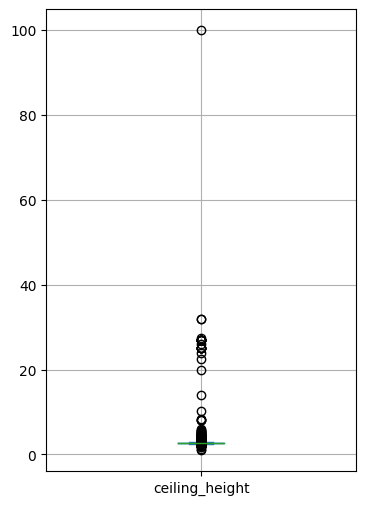

In [32]:
data.ceiling_height.plot.box(grid=True, figsize=(4, 6));
data.ceiling_height.median()

The attention-grabbing value of 100 meters is unique. Since such a value cannot be explained by an extra zero or a missing point (neither the value of 1m nor 10m seems logical), we simply delete this line.

In [33]:
data = data[data.ceiling_height < 40]
data.shape

(23698, 23)

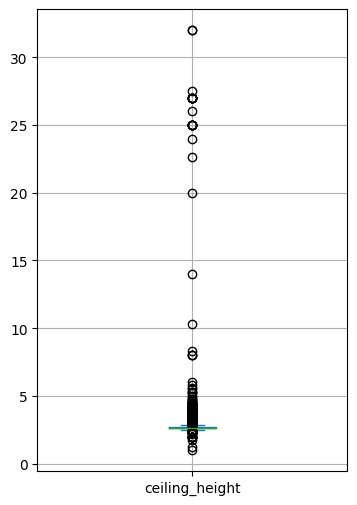

In [34]:
data.ceiling_height.plot.box(grid=True, figsize=(4, 6));

Values in the range of 20-40 meters are easy to explain - people may have missed a point when entering information. Therefore, such values can simply be lowered by an order of magnitude.

In [35]:
data.loc[(20 <= data.ceiling_height) & (data.ceiling_height < 40), 'ceiling_height'] /= 10

The nature of the values in the range of approximately 4.5-15 meters is difficult to understand. There can be no missing points here, since a ceiling height of one and a half meters is not realistic. At the same time, 4.5-15 m is too high for an apartment. Ceilings below 2 meters are also not suitable for living quarters.\
I propose to estimate the number of such anomalies and discard them if they make up a small part of the total number of lines.

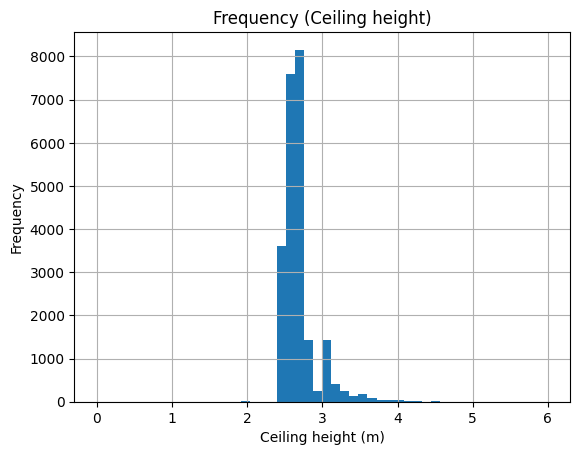

In [36]:
data.ceiling_height.hist(bins=50, range=(0, 6));

plt.title('Frequency (Ceiling height)')
plt.xlabel('Ceiling height (m)')
plt.ylabel('Frequency')
plt.show()

In [37]:
data[(data.ceiling_height < 2.4) | (data.ceiling_height > 4.5)]['ceiling_height'].count() / len(data)

0.001772301460038822

Such anomalies make up only 0.2% of the total number of ads. We can safely remove them.

In [38]:
data = data[~((data.ceiling_height < 2.4) | (data.ceiling_height > 4.5))]
len(data)

23656

##### `kitchen_area`
Let's look at the distribution of kitchen area values in order to understand which range to study more closely.

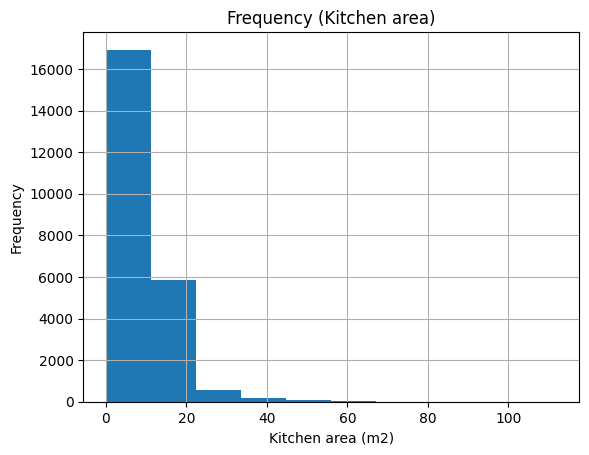

In [39]:
data.kitchen_area.hist();

plt.title('Frequency (Kitchen area)')
plt.xlabel('Kitchen area (m2)')
plt.ylabel('Frequency')
plt.show()

We will display options with a kitchen area of more than 60 m2.

In [40]:
data.loc[data.kitchen_area > 60, ['kitchen_area', 'total_area']]

,kitchen_area,total_area
492,77.000000,216.0
581,62.731354,365.0
1085,66.000000,323.0
2489,100.700000,255.0
4394,77.000000,174.0
5358,100.000000,590.0
5873,68.746689,400.0
6193,70.000000,230.0
7543,63.400000,307.8
7674,65.309354,380.0


There were quite a few such proposals, and nowhere does the kitchen area exceed the total size of the apartment. There are no anomalies.

##### `airports_nearest`
We will study apartments in which the distance to the airport is less than 1000 meters.

In [41]:
data[data.airports_nearest < 1000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floors_cat
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,False,False,False,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,1


It turns out that there is only one such line. Let's delete it.

In [42]:
data = data[(data.airports_nearest >= 1000) | (data.airports_nearest.isna())]
len(data)

23655

##### `last_price`

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floors_cat
12971,19,763000000.0,400.0,2017-09-30,7,2.7,10.0,250.0,10,False,False,False,68.746689,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,2


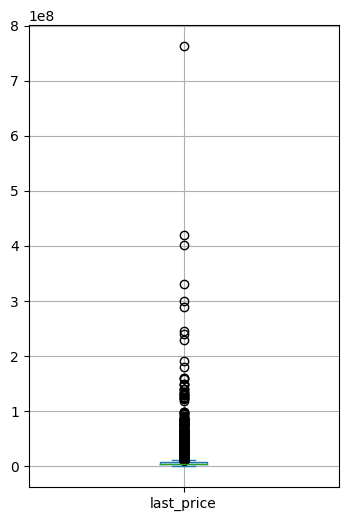

In [43]:
data.last_price.plot.box(figsize=(4, 6), grid=True);
data[data.last_price == data.last_price.max()]

I wouldn't argue that outliers in something as scalable as the price of an item are necessarily glitches or typos. The apartment could well have been sold for 700+ million, although it is difficult to imagine this according to its characteristics. \
However, these anomalies are single and clearly do not reflect the entire dataset. We can easily get rid of them so that the conclusions about the average transactions become more accurate.

The interquartile range method would estimate the anomaly boundary (upper + 1.5IQR) at about 12 million. But it is wrong to cut off all trades that took place at a price higher than this. Therefore, let's estimate the border of "normality" of the price of the object according to the schedule. It can be seen that above 100 million rubles the number of transactions decreased significantly, and after 150 million they began to be completely piecemeal. I propose to choose the last number as the boundary.

In [44]:
data = data[data.last_price < 1.5e+08]
data.shape[0]

23639

##### `rooms`

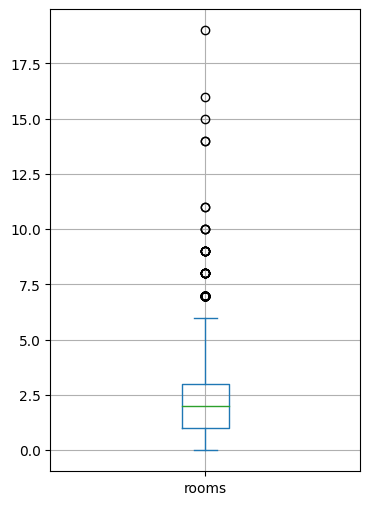

In [45]:
data.rooms.plot.box(figsize=(4, 6), grid=True);

This time we're dealing more with an unscalable quantity, so let's trust the boxplot's suggested normality limit of +_ 6 rooms.

In [46]:
data[data.rooms <= 6].shape[0] / data.shape[0]

0.9964465501924785

Such a filter cuts off less than a percent of rows. We boldly apply.

In [47]:
data = data[data.rooms <= 6]

Let's output all lines where the number of rooms is equal to zero. Let's examine the columns `studio`, `is_apartment`, `total_area`, `floors_total`.

In [48]:
data.loc[data.rooms == 0, ['studio', 'is_apartment', 'total_area', 'floors_total']].head(20)

,studio,is_apartment,total_area,floors_total
144,True,False,27.00,24.0
349,False,False,25.00,14.0
440,True,False,27.11,17.0
508,False,False,34.40,26.0
608,True,False,25.00,10.0
697,True,False,24.10,25.0
716,True,False,17.00,9.0
780,False,False,26.10,18.0
839,False,False,35.00,5.0
946,False,False,23.00,27.0


We see that a significant proportion of such apartments are studios, which are not so numerous in the entire sample. That is, for this type of apartment, living space is not included in the concept of a room. So zero values in this column should not be considered anomalous.

##### `total_area`

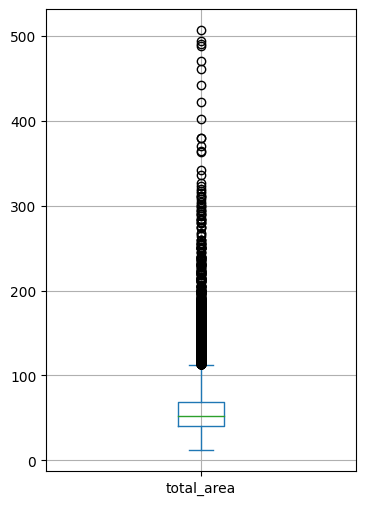

In [49]:
data.total_area.plot.box(figsize=(4, 6), grid=True);

It would be logical to cut off apartments with a total area larger than the median for six-room apartments. After all, we took such a threshold of rooms in the previous step.

In [50]:
data.groupby('rooms')['total_area'].median()

rooms
0     26.025
1     36.580
2     53.000
3     73.000
4     99.000
5    145.000
6    182.000
Name: total_area, dtype: float64

In [51]:
data[data.total_area <= 182].shape[0] / data.shape[0]

0.9911271492252176

In [52]:
data = data[data.total_area <= 182]

### Adding new columns
#### Price per square meter

In [53]:
data['sq_meter_price'] = round(data.last_price / data.total_area)

#### The day of the week the ad was published (0 - Monday, 1 - Tuesday, and so on)

In [54]:
data['weekday_published'] = data.first_day_exposition.dt.weekday

#### Month of ad publication

In [55]:
data['month_published'] = data.first_day_exposition.dt.month

#### Year of ad publication

In [56]:
data['year_published'] = data.first_day_exposition.dt.year

#### Apartment floor type (values are “first”, “last”, “other”)

In [57]:
#function to create categories
def floor_type(row):
    if row.floor == 1:
        return 'первый'
    elif row.floor == row.floors_total:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(floor_type, axis=1)

#### Distance to city center in kilometers

In [58]:
data['city_center_distance_km'] = round(data.city_centers_nearest / 1000)

Let's check the data in the new columns.

In [59]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floors_cat,sq_meter_price,weekday_published,month_published,year_published,floor_type,city_center_distance_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2,120370.0,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.70,11.0,18.600000,1,False,False,False,11.000000,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2,82921.0,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.60,5.0,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,1,92786.0,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,90.289724,9,False,False,False,27.326809,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2,408176.0,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2,100000.0,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.70,12.0,14.400000,5,False,False,False,9.100000,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2,95066.0,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.70,26.0,10.600000,6,False,False,False,14.400000,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,2,99196.0,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,40.658769,22,False,False,False,18.900000,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,2,110545.0,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.430000,26,False,False,False,8.810000,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,2,87455.0,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,False,False,6.500000,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,1,88525.0,6,2,2017,другой,15.0


### Exploratory data analysis

#### Total area

count    23346.000000
mean        57.714157
std         25.417633
min         12.000000
25%         40.000000
50%         51.600000
75%         68.400000
max        182.000000
Name: total_area, dtype: float64

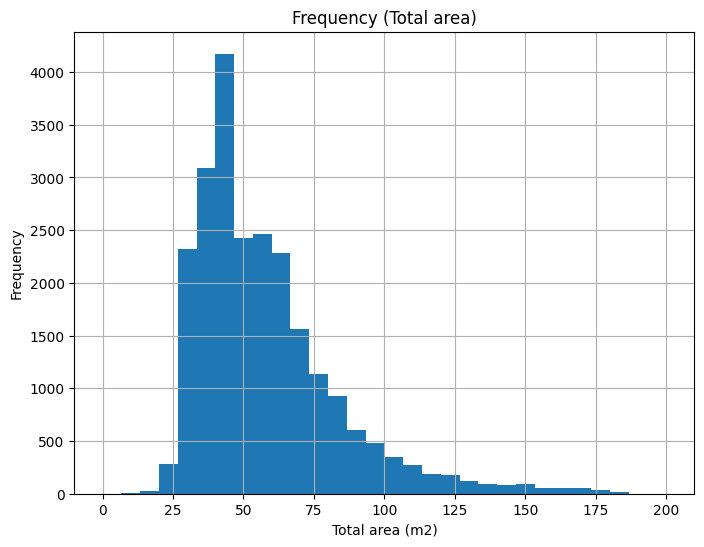

In [60]:
data.total_area.plot(kind='hist', 
                     bins=30, 
                     title='Frequency (Total area)', 
                     figsize=(8, 6), 
                     range=(0, 200), 
                     grid=True
                    );
plt.xlabel('Total area (m2)')

data.total_area.describe()

The peak in the number of ads for the sale of apartments with an area of 30-50 m2 is logical, as it corresponds to standard 1-2-room apartments.\
As the area of housing increases, the number of published ads decreases exponentially.

#### Living space

count    23346.000000
mean        33.013528
std         16.639178
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

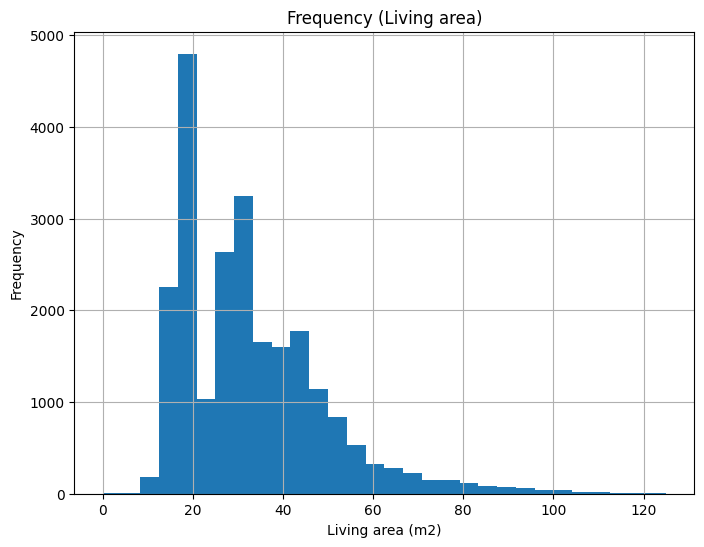

In [61]:
data.living_area.plot(kind='hist', 
                      bins=30, 
                      title='Frequency (Living area)', 
                      figsize=(8, 6), 
                      range=(0, 125), 
                      grid=True
                     )
plt.xlabel('Living area (m2)')
data.living_area.describe()

The nature of the dependence of the number of ads on the size of the living area of the apartment is similar to the dependence on the total area. \
However, at 20 m2 there is an unnatural drop in the number of apartments for sale. Perhaps it reflects the transition from ads for the sale of one-room apartments to two-room apartments.\
Let's test this hypothesis by considering the typical values of residential areas for these two categories.

In [62]:
data[data.rooms.isin([1, 2])].groupby('rooms')['living_area'].median()

rooms
1    17.8
2    30.5
Name: living_area, dtype: float64

Indeed, the median values of living areas for one-room and two-room apartments are located exactly at the place of the histogram peaks.

#### Kitchen area

count    23346.000000
mean        10.198448
std          5.305601
min          0.000000
25%          7.000000
50%          9.000000
75%         11.700000
max         93.200000
Name: kitchen_area, dtype: float64

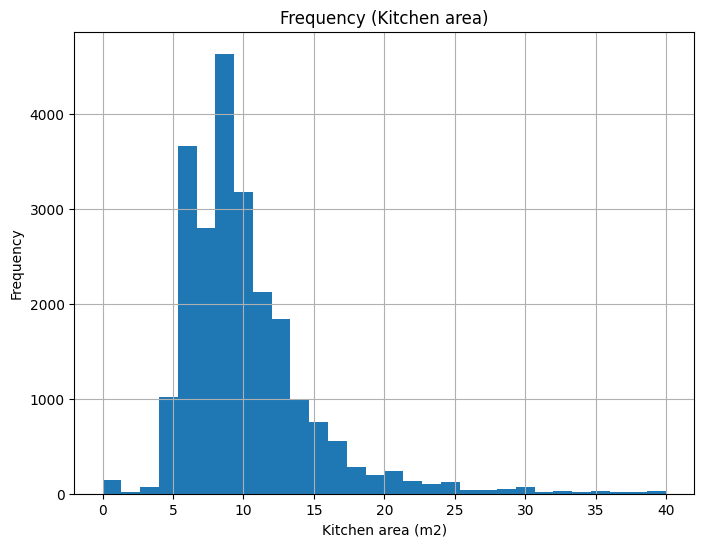

In [63]:
data.kitchen_area.plot(kind='hist', 
                      bins=30, 
                      title='Frequency (Kitchen area)', 
                      figsize=(8, 6), 
                      range=(0, 40), 
                      grid=True
                     )
plt.xlabel('Kitchen area (m2)')

data.kitchen_area.describe()

Similar to the previous graphs, the number of listings decreases exponentially as the kitchen area increases. Here the decline is even sharper.
This can be explained by the fact that the size of the kitchen has a certain logical limit. For example, if all the necessary household appliances are already placed, and a table for a large family is freely located in the room, then a larger kitchen area is already becoming redundant.

#### Object price

count    2.334600e+04
mean     5.923556e+06
std      5.305251e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      1.350000e+08
Name: last_price, dtype: float64
90% of apartments sold for less than 10300000.0 roubles


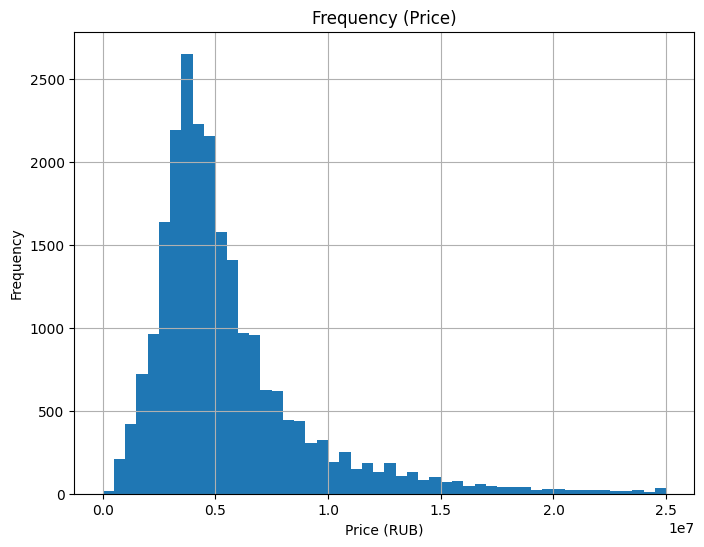

In [64]:
data.last_price.plot(kind='hist', 
                      bins=50, 
                      title='Frequency (Price)', 
                      figsize=(8, 6), 
                      range=(0, 2.5e+07), 
                      grid=True
                     )
plt.xlabel('Price (RUB)')

print(data.last_price.describe())
print('90% of apartments sold for less than', data.last_price.quantile(0.9), 'roubles')

75% of the displayed apartments were sold for less than 6.7 million rubles. 10% of transactions were concluded for amounts over RUB 10.3 million.
The largest number of transactions was concluded for +_ 4.6 million rubles.

#### Number of rooms

count    23346.000000
mean         2.023002
std          0.972323
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

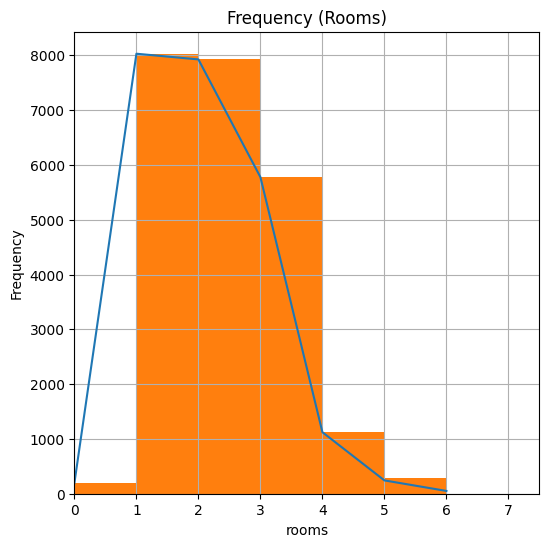

In [65]:
ax = data.groupby('rooms')['rooms'].count().plot(xlim=(0, 7.5))
data.rooms.plot(kind='hist',
                     bins=data['rooms'].max(),
                     title='Frequency (Rooms)', 
                     figsize=(6, 6),
                     range=(0, 6),
                     ax=ax,
                     grid=True
                    );
data.rooms.describe()

The peak falls on ads for the sale of one-room and two-room apartments - the dataset contains approximately 8,000 transactions for both types.\
Three-room apartments were sold for 2 thousand pieces less. But starting from 4 rooms, the number of real estate options immediately becomes 6 times less, and continues to decline as their number increases.\
Also, we have already found out that many studios have 0 in the number of rooms. On the graph we can see that the share of such offers from the total set of apartments is extremely small.

#### Ceiling height

count    23346.000000
mean         2.693436
std          0.205830
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.500000
Name: ceiling_height, dtype: float64

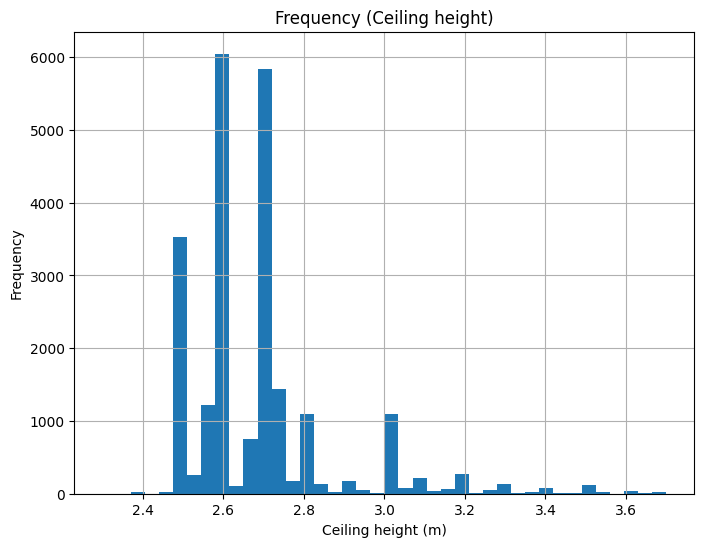

In [66]:
data.ceiling_height.plot(kind='hist', 
                     bins=40, 
                     title='Frequency (Ceiling height)', 
                     figsize=(8, 6),
                     range=(2.3, 3.7),
                     grid=True
                    );
plt.xlabel('Ceiling height (m)')

data.ceiling_height.describe()

Several peaks are visible on the graph: two powerful peaks in the region of 2.6 and 2.7 meters and three smaller ones near 2.5, 2.8 and 3.0 meters. Most likely they are apartments in houses of standard projects. If you find out the height of the ceilings in houses of different projects, then you can quite accurately determine how many “stalinoks”, “Khrushchevs”, etc. presented in the dataset.
- According to information on the Internet, the height of the ceilings in "Stalinist" houses is from 2.9 to 3.2 meters. Ads for their sale may well make up most of the rightmost peak on the histogram. Roughly their number can be estimated at one thousand.
- About "Khrushchev" it is known that the height of their ceilings is 2.5 meters - the leftmost peak of the histogram. Rough estimate - 3 thousand ads.
- One of the powerful peaks in the region of 2.7 m should fall on the so-called "brezhnevkas", the number of advertisements for the sale of which we can roughly estimate at 6 thousand.
- Peaks in the region of 2.6 and 2.8 m could not be associated with standard projects.

#### Apartment floor

count    23346.000000
mean         5.905637
std          4.895416
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

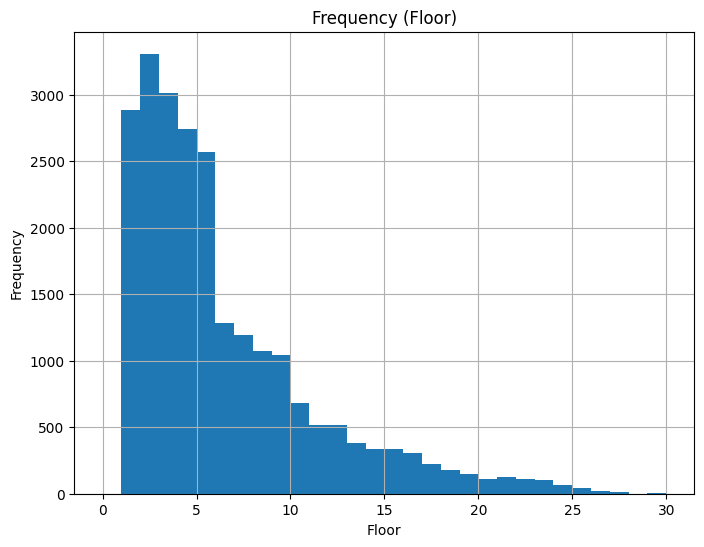

In [67]:
data.floor.plot(kind='hist', 
                     bins=30, 
                     title='Frequency (Floor)', 
                     figsize=(8, 6),
                     range=(0, 30),
                     grid=True
                    );
plt.xlabel('Floor')
data.floor.describe()

An interesting fact - most apartments are sold on the 3rd floor.\
Of the features of the distribution, one can note a sharp decline in the number of ads starting from the 6th floor. It can be assumed that most of the apartments for sale were located in five-story buildings. \
The next similar decline is visible starting from the 10th floor. Logically, the 9-storey building is a typical project. There are many such houses, and therefore there are also ads for sale.\
Further, the number of ads gradually decreases to zero with the growth of the floor. The most "high-rise" apartment was sold on the 33rd floor.

#### Apartment floor type ("first", "last", "other")

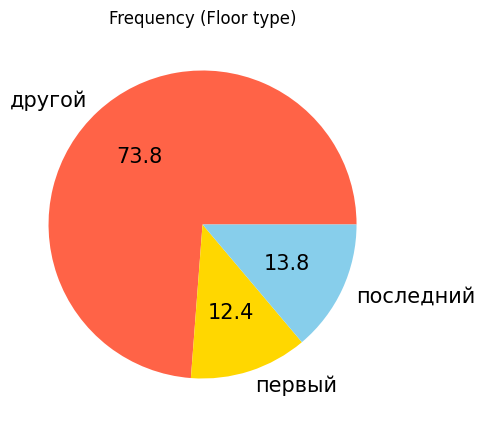

In [68]:
data.groupby('floor_type').size().plot(kind='pie',
                                       autopct='%.1f',
                                       figsize=(5, 5),
                                       textprops={'fontsize': 15},
                                       colors=['tomato', 'gold', 'skyblue']
                                      );
plt.title('Frequency (Floor type)')
plt.show()

The probability of finding an apartment on the first floor is almost the same as on the last floor - 12-14%.

#### Total number of floors in the building

count    23261.000000
mean        10.727699
std          6.606477
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

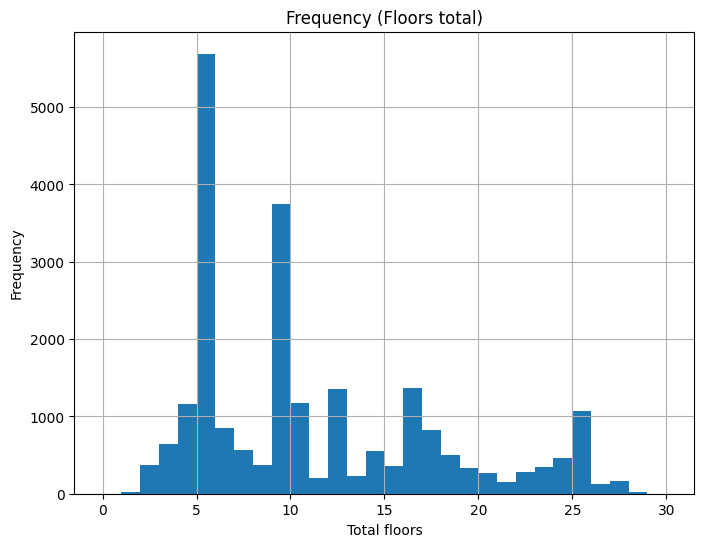

In [69]:
data.floors_total.plot(kind='hist', 
                     bins=30, 
                     title='Frequency (Floors total)', 
                     figsize=(8, 6),
                     range=(0, 30),
                     grid=True
                    );
plt.xlabel('Total floors')
data.floors_total.describe()

This histogram clearly illustrates the conclusion made above that a significant part of the dataset consists of apartments in 5- and 9-storey buildings. Peaks in the number of ads were also found in houses with 12th, 16th and 25th floors. Apparently, this is also a certain standard of construction.

#### Distance to city center in meters

count    17851.000000
mean     14316.974847
std       8586.561670
min        181.000000
25%       9488.000000
50%      13171.000000
75%      16358.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

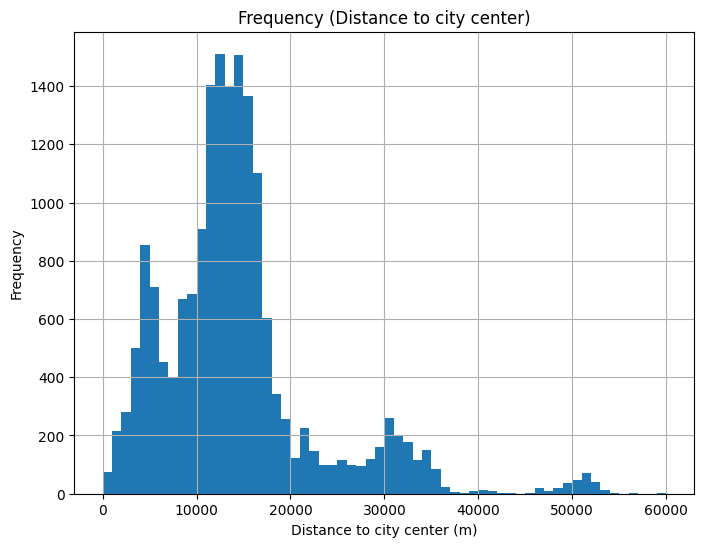

In [70]:
data.city_centers_nearest.plot(kind='hist', 
                     bins=60, 
                     title='Frequency (Distance to city center)', 
                     figsize=(8, 6),
                     range=(0, 6e+04),
                     grid=True
                    );
plt.xlabel('Distance to city center (m)')

data.city_centers_nearest.describe()

Most of the houses are located at a distance of 9-16 km from the city center. \
Small peaks around 30 and 50 kilometers probably represent some of the residential areas of a large city like St. Petersburg. \
We also see a large peak about 5 kilometers.\
Let's try to figure out what these settlements are. Let's create a function that will assign categories `0`, `1`, `2`, `3` to ads when they are 3-5, 10-17, 29-33 and 49-53 km away from the center, respectively. The rest will be assigned the category `'undefined'`.

In [71]:
def distance_category(row):
    if 3000 <= row.city_centers_nearest <= 5000:
        return 0
    elif 10000 <= row.city_centers_nearest <= 17000:
        return 1
    elif 29000 <= row.city_centers_nearest <= 33000:
        return 2
    elif 49000 <= row.city_centers_nearest <= 53000:
        return 3
    else:
        return 'undefined'
    
#Create a column with categories
data['distance_cat'] = data.apply(distance_category, axis=1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floors_cat,sq_meter_price,weekday_published,month_published,year_published,floor_type,city_center_distance_km,distance_cat
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2,120370.0,3,3,2019,другой,16.0,1
1,7,3350000.0,40.40,2018-12-04,1,2.70,11.0,18.600000,1,False,False,False,11.000000,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2,82921.0,1,12,2018,первый,19.0,undefined
2,10,5196000.0,56.00,2015-08-20,2,2.60,5.0,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,1,92786.0,3,8,2015,другой,14.0,1
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,90.289724,9,False,False,False,27.326809,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2,408176.0,4,7,2015,другой,7.0,undefined
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2,100000.0,1,6,2018,другой,8.0,undefined
5,10,2890000.0,30.40,2018-09-10,1,2.70,12.0,14.400000,5,False,False,False,9.100000,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2,95066.0,0,9,2018,другой,NaN,undefined
6,6,3700000.0,37.30,2017-11-02,1,2.70,26.0,10.600000,6,False,False,False,14.400000,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,2,99196.0,3,11,2017,другой,19.0,undefined
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,40.658769,22,False,False,False,18.900000,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,2,110545.0,3,4,2019,другой,12.0,1
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.430000,26,False,False,False,8.810000,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,2,87455.0,2,5,2018,другой,NaN,undefined
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,False,False,6.500000,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,1,88525.0,6,2,2017,другой,15.0,1


Now let's group the ads into new categories and look at the most common settlements in them.

In [72]:
data.groupby('distance_cat')['locality_name'].value_counts().head(17)

distance_cat  locality_name       
0             Санкт-Петербург         1341
1             Санкт-Петербург         9195
2             Колпино                  241
              поселок Шушары           175
              Пушкин                   136
              Петергоф                  95
              Красное Село              90
              Павловск                  24
              Сестрорецк                21
              поселок Понтонный         14
              Санкт-Петербург            3
              поселок Металлострой       1
3             Ломоносов                115
              Кронштадт                 61
              Петергоф                   9
              Зеленогорск                8
undefined     Санкт-Петербург         4869
Name: locality_name, dtype: int64

- Absolutely unequivocally it can be said that the peaks of the histogram in the region of 3-5 and 10-17 km correspond to some densely populated areas of St. Petersburg.
- In addition, the fact came to light that when calculating the distance to the center for all settlements, the center of St. Petersburg is taken.
- In the cities of Kolpino, Pushkin, Peterhof, Lomonosov, Kronstadt and the village of Shushary, Leningrad Region, a significant number of apartments were also put up for sale.

#### Distance to nearest airport

count    17974.000000
mean     28907.483949
std      12739.586058
min       6450.000000
25%      18542.000000
50%      26801.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

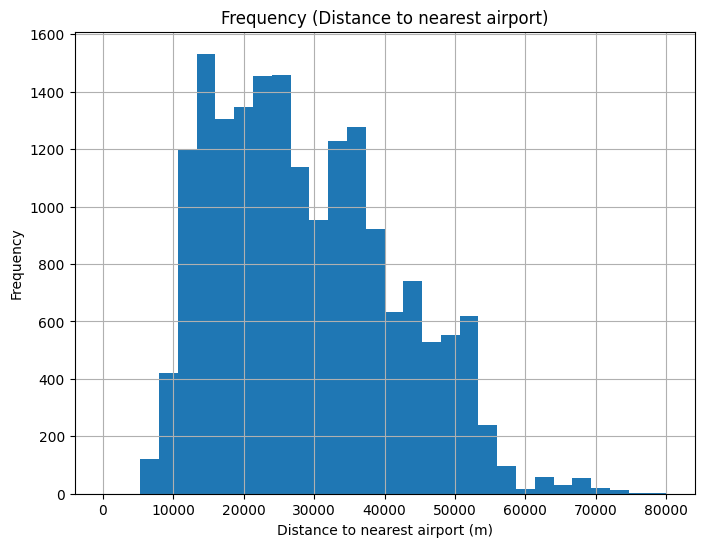

In [73]:
data.airports_nearest.plot(kind='hist', 
                            bins=30, 
                            title='Frequency (Distance to nearest airport)', 
                            figsize=(8, 6),
                            range=(0, 8e+04),
                            grid=True
                            );
plt.xlabel('Distance to nearest airport (m)')

data.airports_nearest.describe()

Since St. Petersburg is served by a single airport - Pulkovo - most likely, all distances are indicated to it.\
It is located at a distance of about 15 kilometers from the city. Just in the range of 10-25 km, the largest number of apartments was located.

#### Distance to nearest park

count    7856.000000
mean      491.401858
std       341.766365
min         1.000000
25%       288.000000
50%       455.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

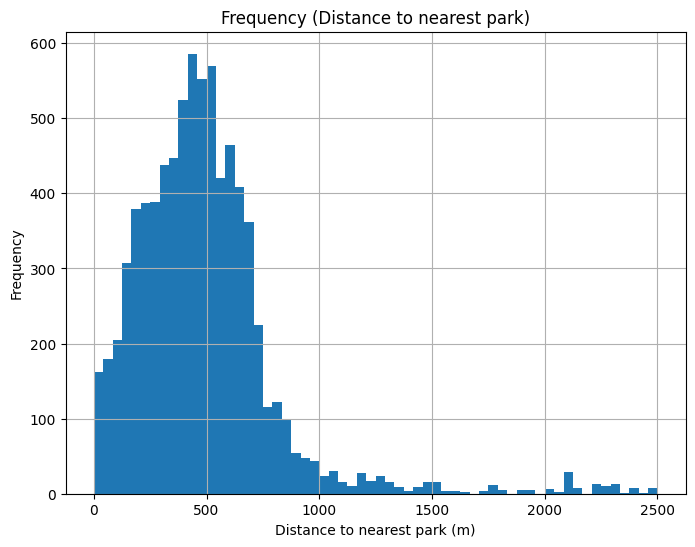

In [74]:
data.parks_nearest.plot(kind='hist', 
                        bins=60, 
                        title='Frequency (Distance to nearest park)', 
                        figsize=(8, 6),
                        range=(0, 2500),
                        grid=True
                        );
plt.xlabel('Distance to nearest park (m)')
data.parks_nearest.describe()

For the vast majority of properties, the distance to the nearest park is less than one kilometer.

#### Day and month of ad publication

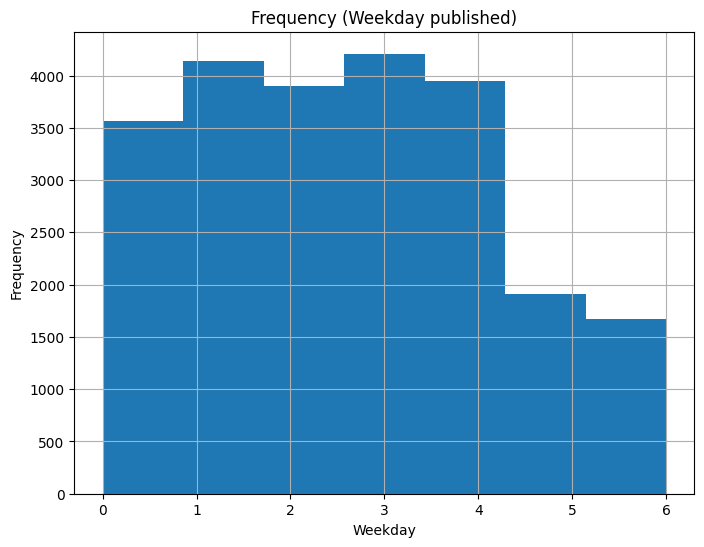

In [75]:
data.weekday_published.plot(kind='hist', 
                            bins=7, 
                            title='Frequency (Weekday published)', 
                            figsize=(8, 6),
                            grid=True
                            );
plt.xlabel('Weekday')
plt.show()

It is clearly seen that half as many ads were published on weekends as on weekdays.

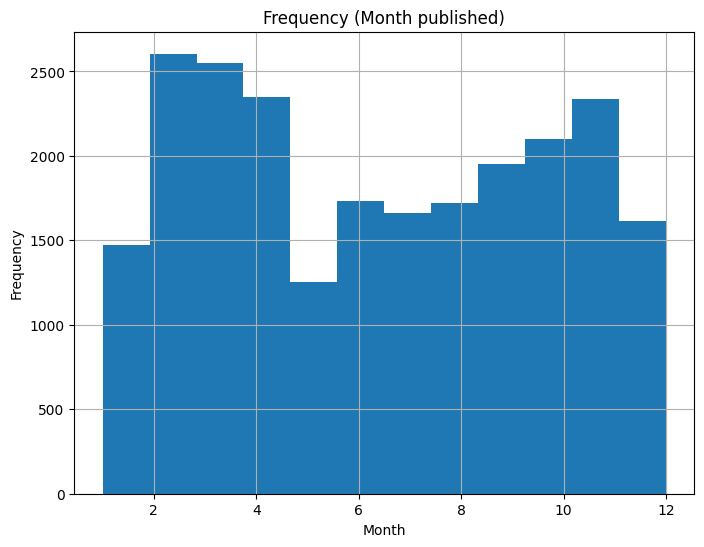

In [76]:
data.month_published.plot(kind='hist', 
                          bins=12, 
                          title='Frequency (Month published)', 
                          figsize=(8, 6),
                          grid=True
                          );
plt.xlabel('Month')
plt.show()

- In `January` people are rather inactive posting ads for the sale of apartments.
- A sharp surge in their number begins in `February` and continues until `April`.
- In May, the smallest number of real estate objects for the year is put up for sale.
- From the `end of summer` the activity begins to increase again until the second peak in `November`.
- `Before the end of the year` new announcements again becomes less.

#### Sale duration

count    20247.000000
mean       179.523880
std        218.084975
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64
median: 95.0


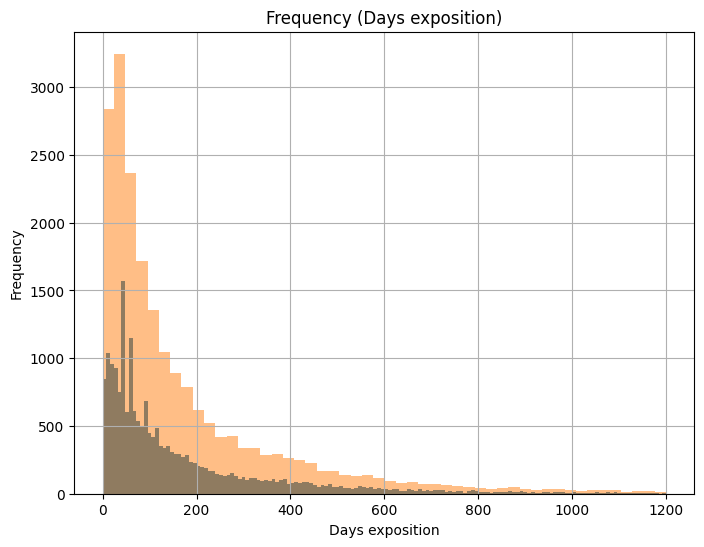

In [77]:
ax = data.days_exposition.plot(kind='hist', 
                          bins=150, 
                          title='Frequency (Days exposition)', 
                          figsize=(8, 6),
                          range=(0, 1200),
                          grid=True
                          )
data.days_exposition.plot(kind='hist', 
                          bins=50, 
                          title='Frequency (Days exposition)', 
                          figsize=(8, 6),
                          range=(0, 1200),
                          ax=ax,
                          alpha=0.5,
                          grid=True
                          )
plt.xlabel('Days exposition')

print(data.days_exposition.describe())
print('median:', data.days_exposition.median())

plt.show()

Both constructed histograms reflect how often apartments were sold for a certain number of days, and differ only in scale.\
When the range of values combined in one column is reduced, unnatural peaks are found in the region of about 50 days. Let's explore this area in more detail.

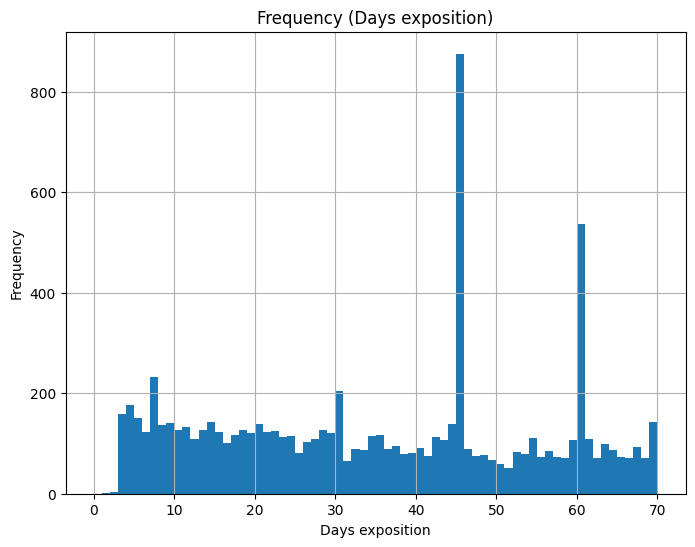

In [78]:
data.days_exposition.plot(kind='hist', 
                          bins=70, 
                          title='Frequency (Days exposition)', 
                          figsize=(8, 6),
                          range=(0, 70),
                          grid=True
                          )
plt.xlabel('Days exposition')
plt.show()

Bursts of this magnitude can definitely be called anomalous. I can assume that ads that are not supported by the seller in an active state are automatically closed by the system after 45/60 days, and the appropriate value is put in the `days_exposition` column.\
However, the most likely cause of such outliers is a failure to upload data. In any case, this point requires further study.

The median value of the duration of the sale of apartments was 95 days, the average - almost twice as long - 180 days.\
Let's determine which sales can be considered fast, and which ones are unusually long.

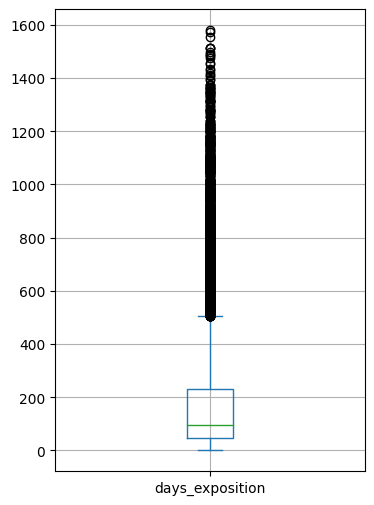

In [79]:
data.days_exposition.plot.box(figsize=(4, 6), grid=True);

- According to the interquartile range method, anything that has been on sale for more than 500 days is an anomaly.
- About the apartments that were on sale for more than 230 days, we can say that they were sold longer than usual.
- All objects for which transactions were concluded within 45 days from the date of publication were sold quickly.

#### Assessing the impact of various parameters on the price of an object
##### Total area

0.7129728577585075

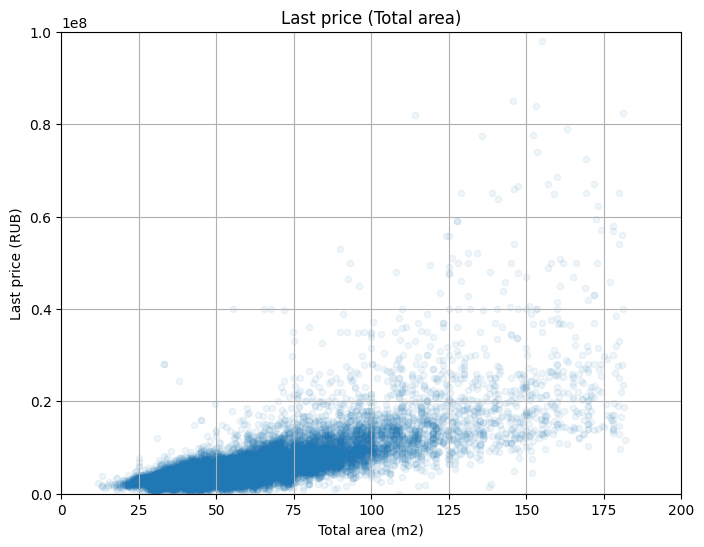

In [80]:
data.plot(x='total_area', 
          y='last_price', 
          kind='scatter', 
          figsize=(8, 6), 
          alpha=0.07,
          ylim=(0, 1e+08), 
          xlim=(0, 200),
          grid=True
         )
plt.xlabel('Total area (m2)')
plt.ylabel('Last price (RUB)')
plt.title('Last price (Total area)')

data.last_price.corr(data.total_area)

There is a fairly pronounced positive correlation between the price of an object and the total area of housing (Pearson's correlation coefficient is 0.71). The graph shows that for apartments with an area of up to 100 m2, the dependence is close to linear. Other factors begin to have a significant impact on the prices of larger apartments.

##### Living space

0.5998095147828165

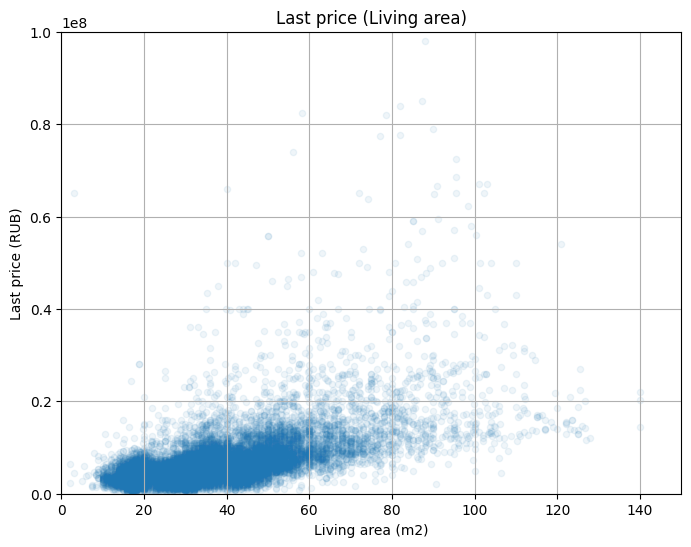

In [81]:
data.plot(x='living_area', 
          y='last_price', 
          kind='scatter', 
          figsize=(8, 6), 
          alpha=0.07,
          ylim=(0, 1e+08), 
          xlim=(0, 150),
          grid=True
         )

plt.xlabel('Living area (m2)')
plt.ylabel('Last price (RUB)')
plt.title('Last price (Living area)')

data.last_price.corr(data.living_area)

For living space, the situation is similar. The Pearson correlation coefficient of this value with the price of the object is slightly lower, 0.6.\
After exceeding the living area of 50 m2, pricing begins to depend largely on other factors.

##### Kitchen area

0.5804141644905773

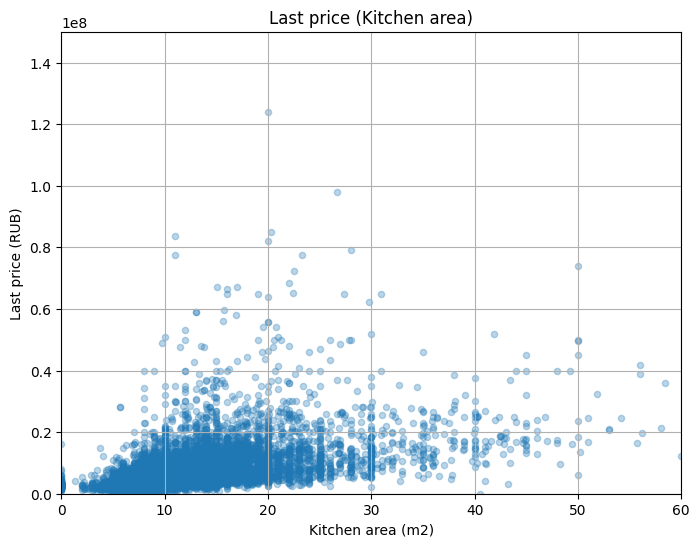

In [82]:
data.plot(x='kitchen_area', 
          y='last_price', 
          kind='scatter', 
          figsize=(8, 6), 
          alpha=0.3,
          ylim=(0, 1.5e+08), 
          xlim=(0, 60),
          grid=True
         )

plt.xlabel('Kitchen area (m2)')
plt.ylabel('Last price (RUB)')
plt.title('Last price (Kitchen area)')

data.last_price.corr(data.kitchen_area)

The size of the kitchen affects the price of the apartment, especially when its area starts to exceed 10 m2.

##### Number of rooms

0.4133183418432226

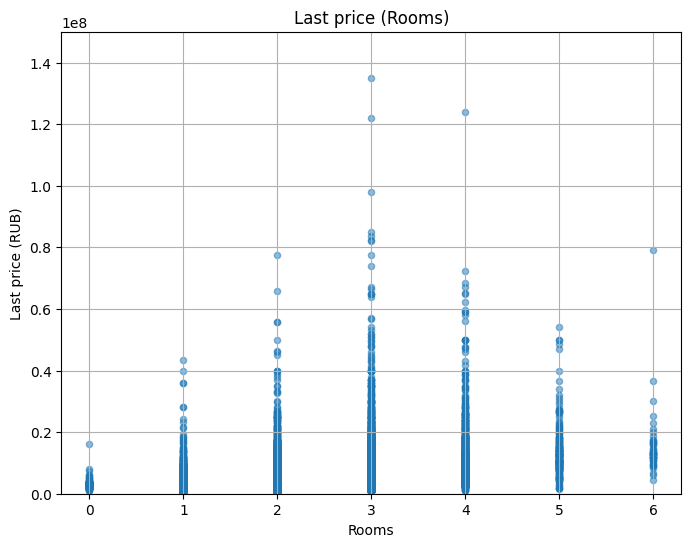

In [83]:
data.plot(x='rooms', 
          y='last_price', 
          kind='scatter', 
          figsize=(8, 6), 
          alpha=0.5,
          ylim=(0, 1.5e+08), 
          grid=True
         )

plt.xlabel('Rooms')
plt.ylabel('Last price (RUB)')
plt.title('Last price (Rooms)')

data.last_price.corr(data.rooms)

We can say that the number of rooms is positively correlated with the maximum price for which the respective apartments were sold. However, it does not affect the average price of transactions.

##### Floor where the apartment is located (first, last, second)

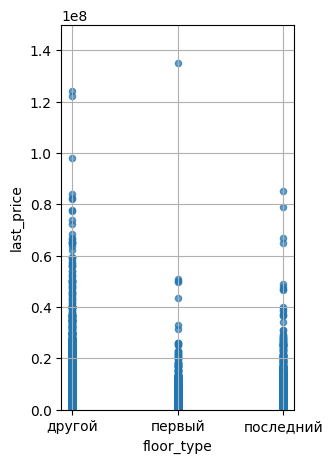

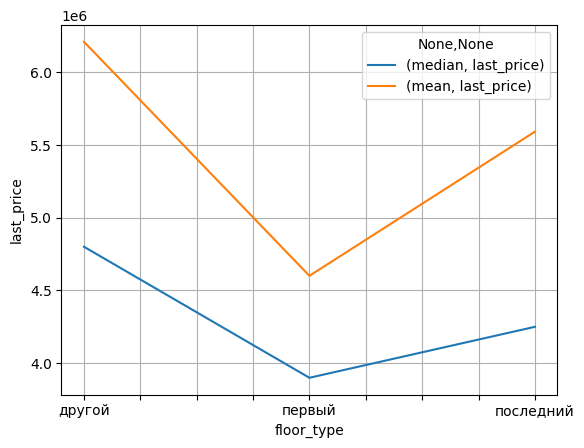

In [84]:
data.plot(x='floor_type', 
          y='last_price', 
          kind='scatter', 
          figsize=(3, 5),
          ylim=(0, 1.5e+08),
          alpha=0.7,
          grid=True
         );
(round(data.pivot_table(index='floor_type', values='last_price', aggfunc=['median', 'mean']))
    .plot(grid=True,
          ylabel='last_price'
         )
);

The floor on which it is located has a significant impact on the price of an apartment. On average, apartments on the first floor sold **a third** cheaper than those on the top floor. Between the median values there is the same correlation, but smaller.\
For an apartment on any floor except the first one, they will also pay more.

##### Ad posting dates (weekday, month, year)

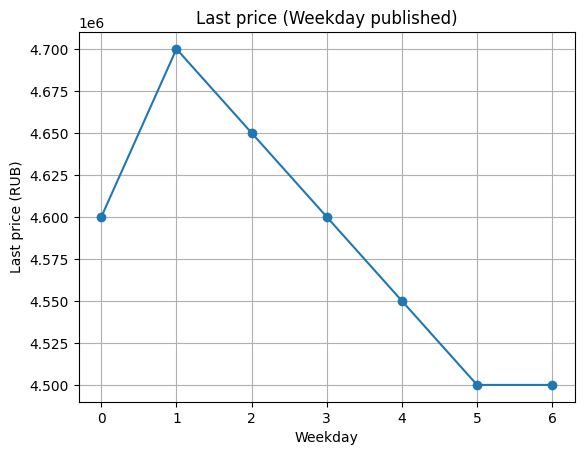

In [85]:
data.groupby('weekday_published').last_price.median().plot(style='o-', grid=True, ylabel='last_price');

plt.xlabel('Weekday')
plt.ylabel('Last price (RUB)')
plt.title('Last price (Weekday published)')
plt.show()

Surprisingly, the apartments placed on `Tuesday` sold the most expensive. Transactions on ads posted `over the weekend` were at prices lower by about 4.2%. What is also impressive is the absolutely linear decline in the dependence of the price on the day of publication in the interval Tuesday-Saturday.

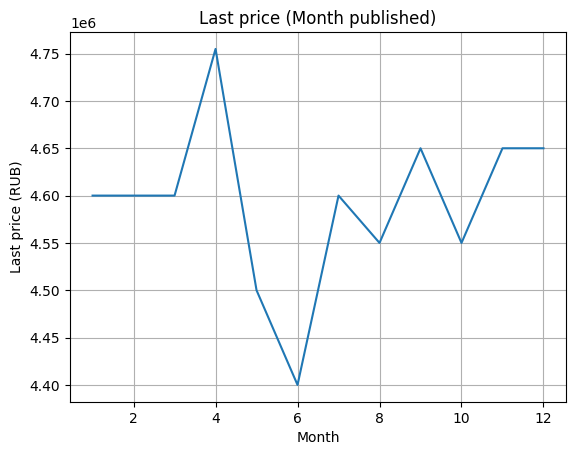

In [86]:
data.groupby('month_published').last_price.median().plot(grid=True, ylabel='last_price');

plt.xlabel('Month')
plt.ylabel('Last price (RUB)')
plt.title('Last price (Month published)')
plt.show()

We see that the apartments put up for sale in `April` were sold at the highest price, and those published in `June` - for the lowest price among annual values.\
However, it is impossible to establish an unambiguous dependence. In other months, the median transaction prices are almost equal and fluctuate only a little.

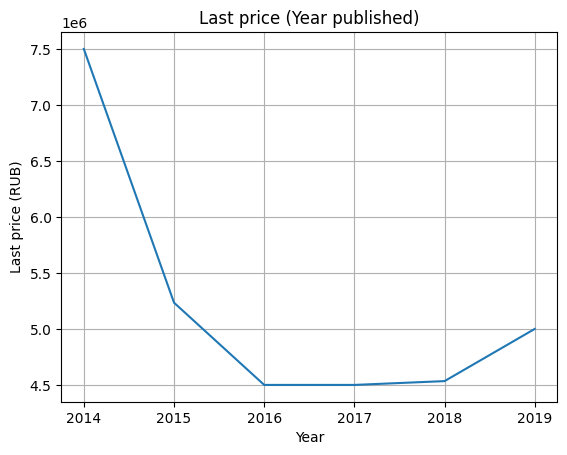

In [87]:
data.groupby('year_published').last_price.median().plot(grid=True, ylabel='last_price');

plt.xlabel('Year')
plt.ylabel('Last price (RUB)')
plt.title('Last price (Year published)')
plt.show()

But the dependence of the median sale price of an apartment on the year of publication of the announcement is clearly parabolic. The minimum real estate prices in the Leningrad region were observed in `2016`-`2018`. Since that time, their growth began to be observed again.

#### Average price of one square meter in 10 settlements with the largest number of ads

In [88]:
#data_top_10 = data.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(10)
data_top_ten = round(data.pivot_table(index='locality_name', 
                                 values=['sq_meter_price', 'last_price'], 
                                 aggfunc=['mean', 'count']
                                 )
                                                         .sort_values(by=('count', 'last_price'), ascending=False)
                                                         ['mean']['sq_meter_price']
                                                         .head(10)
)
print(
'''
The average cost of one square meter in 10 settlements with the largest number of ads
(in descending order of the number of ads):

''', 
data_top_ten)
print()
print('Locality with the highest cost per square meter:', data_top_ten.sort_values().index[-1],
      f'({data_top_ten.sort_values()[-1]} rub/m2)'
     )
print('Locality with the lowest cost per square meter:', data_top_ten.sort_values().index[0],
      f'({data_top_ten.sort_values()[0]} rub/m2)'
     )


The average cost of one square meter in 10 settlements with the largest number of ads
(in descending order of the number of ads):

 locality_name
Санкт-Петербург      113111.0
поселок Мурино        85682.0
поселок Шушары        78677.0
Всеволожск            68719.0
Пушкин               103047.0
Колпино               75333.0
поселок Парголово     90332.0
Гатчина               68746.0
деревня Кудрово       92474.0
Выборг                58172.0
Name: sq_meter_price, dtype: float64

Locality with the highest cost per square meter: Санкт-Петербург (113111.0 rub/m2)
Locality with the lowest cost per square meter: Выборг (58172.0 rub/m2)


#### Average price of one kilometer to the center of St. Petersburg

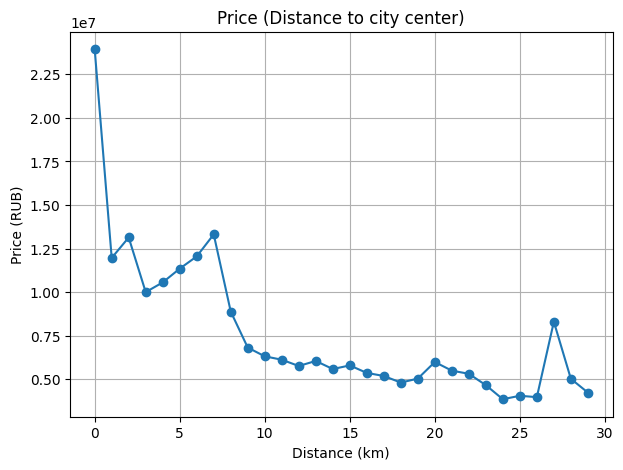

In [89]:
(data[data.locality_name == 'Санкт-Петербург']
                                            .groupby('city_center_distance_km')['last_price']
                                            .mean()
                                            .plot(ylabel='price',
                                                  style='o-',
                                                  figsize=(7, 5),
                                                  grid=True
                                                 )
);

plt.xlabel('Distance (km)')
plt.ylabel('Price (RUB)')
plt.title('Price (Distance to city center)')
plt.show()

The distance to the city center in the range of 0-10 km greatly affects the price of the apartment.\
For the first three kilometers from the center, the average price of real estate is reduced by 2.5 times. Further, there is a local maximum in the region of 7 km, to which the cost of the apartment increases by 40%. After overcoming the border of 10 km, the distance to the center almost ceases to affect the price of the object.

### General conclusion

The archive of Yandex Real Estate ads for several years for the sale of apartments in St. Petersburg and neighboring settlements has omissions, duplicates and anomalous values. However, many of them are fixable and do not interfere with a number of interesting conclusions.

Before the analysis:
- Dataset cleared of duplicates.
- Restored missing values.
- In each column, the limits of normal values were evaluated, and anomalies were removed.
- The data put in the correct format.
- Additional characteristics were calculated for all advertisements: the price of one square meter; day, month and year of publication of the ad; floor type of the apartment; distance to the center in kilometers.

Further, the features of the distribution of all values available in the data set were studied and their impact on the final cost of the object was assessed. Below are the main findings:

- Without contradicting logic, the number of rooms and the size of the kitchen, as well as the size of the living and total areas of the apartments, affect their value. More area - higher price. But only up to a certain point. Further, pricing begins to be influenced by other factors.
- The situation with the distance to the center is also curious. Up to a certain distance, the price drops sharply, and then goes almost to a constant.
- Most of the apartments for sale have 1-2 rooms and are small in area (30-50 m2). They are located most often in 5- and 9-storey buildings.
- Day of the week and month of publication of the announcement of the sale affects the final price of the transaction. It is less profitable to publish ads on weekends. Just like in June.
- Apartments on the first floors of buildings are valued much lower than any other apartments. And those that are located under the roof are valued above the rest.
- The median time from the moment the ad was placed to the deal is 95 days. Selling an apartment in less than 45 days is a success.
- The most expensive square meter - in St. Petersburg - 113k RUB. Closes the top ten most expensive cities with the largest number of ads Vyborg - price per m2: 58k RUB.